In [79]:
#Importing Libraries
import pandas as pd
import random
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [80]:
penguins_cleaned_scaled = pd.read_csv(r'/Users/adarshreddy/Desktop/Assignments/ML/adarshre_dharmaac_assignment1_final/penguins_preprocessed.csv')

In [81]:
X = penguins_cleaned_scaled.drop(columns=['gender_male']).values
Y = penguins_cleaned_scaled['gender_male'].values.reshape(-1,1)
X.shape, Y.shape

((344, 12), (344, 1))

In [82]:
train_test_split = 0.8

train_length = int(train_test_split * len(penguins_cleaned_scaled))
test_length = len(penguins_cleaned_scaled) - train_length

X_train = X[:train_length]
Y_train = Y[:train_length]
X_test = X[train_length:]
Y_test = Y[train_length:]

X_train_with_bias = np.concatenate(( np.array([1]*len(X_train)).reshape(len(X_train),1),X_train),1)
X_test_with_bias = np.concatenate((np.array([1]*len(X_test)).reshape(len(X_test),1),X_test),1)

In [83]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(275, 12) (275, 1) (69, 12) (69, 1)


In [84]:
class LogitRegression():

    def __init__(self, learning_rate, itrs):
        self.learning_rate = learning_rate
        self.itrs = itrs
        self.loss_data=[]
        
    def sigmoid(self, y_linear):
        return 1 / (1 + np.exp(-y_linear))
    
    def cost(self, y_pred, y_actual):
        return -(y_actual * np.log(y_pred) + (1 - y_actual) * np.log(1 - y_pred)).mean()
    
    def gradient_descent(self, X_train, y_actual,y_pred,x_len):
        delta =  y_actual.flatten() - y_pred 
        dW = np.dot(X_train.T, delta)/x_len
        self.weights += self.learning_rate * dW
    
    def fit(self, X_train, y_actual):
        self.weights = np.random.uniform(0, 1, X_train.shape[1])
        
        for i in range(self.itrs):
            x_len=len(X_train)
            y_linear=np.dot(X_train, self.weights) 
            y_pred = self.sigmoid(y_linear)
            self.gradient_descent(X_train, y_actual,y_pred,x_len)
            loss_value = self.cost(y_pred, y_actual.flatten())
            self.loss_data.append(loss_value)
    
    def predict(self, X_train):
        pred = self.sigmoid(np.dot(X_train, self.weights))
        return (pred >= 0.5).astype(int)
    
        

Accuracy:  52.17391304347826


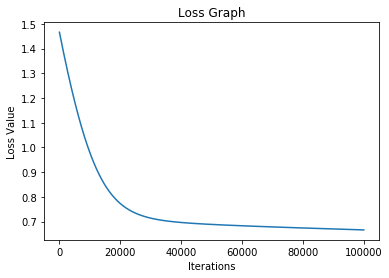

In [88]:
#parameters are learning_rate:  0.0001 itrs:  100000

model1 = LogitRegression(learning_rate=0.0001, itrs=100000)
model1.fit(X_train_with_bias, Y_train)
Y_pred = model1.predict(X_test_with_bias)
curr_accuracy = np.mean(Y_pred == Y_test.flatten()) * 100
print("Accuracy: ", curr_accuracy)

plt.plot(model1.loss_data)
plt.xlabel('Iterations')
plt.ylabel('Loss Value')
plt.title('Loss Graph')
plt.show()

Accuracy:  75.36231884057972


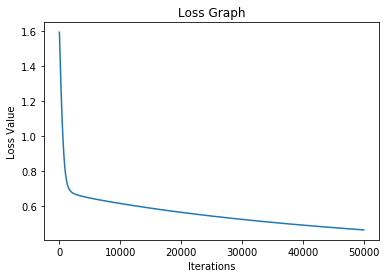

In [89]:
#parameters are learning_rate:  0.002 itrs: 50000

model2 = LogitRegression(learning_rate=0.002, itrs=50000)
model2.fit(X_train_with_bias, Y_train)
Y_pred = model2.predict(X_test_with_bias)
curr_accuracy = np.mean(Y_pred == Y_test.flatten()) * 100
print("Accuracy: ", curr_accuracy)
plt.plot(model2.loss_data)
plt.xlabel('Iterations')
plt.ylabel('Loss Value')
plt.title('Loss Graph')
plt.show()

Accuracy:  86.95652173913044


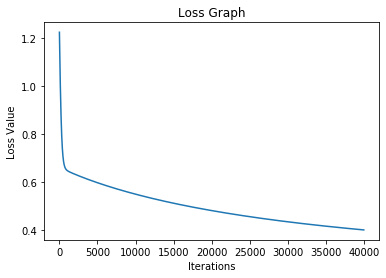

In [90]:
#parameters are learning_rate:  0.004 itrs: 40000

model3 = LogitRegression(learning_rate=0.004, itrs=40000)
model3.fit(X_train_with_bias, Y_train)
Y_pred = model3.predict(X_test_with_bias)
curr_accuracy = np.mean(Y_pred == Y_test.flatten()) * 100
print("Accuracy: ", curr_accuracy)
plt.plot(model3.loss_data)
plt.xlabel('Iterations')
plt.ylabel('Loss Value')
plt.title('Loss Graph')
plt.show()

Accuracy:  84.05797101449275


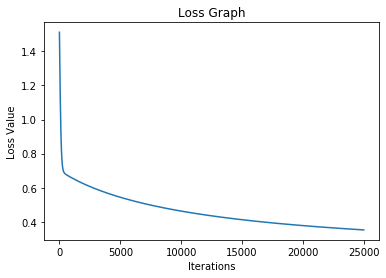

In [91]:
#parameters are learning_rate:  0.01 itrs: 25000

model4 = LogitRegression(learning_rate=0.01, itrs=25000)
model4.fit(X_train_with_bias, Y_train)
Y_pred = model4.predict(X_test_with_bias)
curr_accuracy = np.mean(Y_pred == Y_test.flatten()) * 100
print("Accuracy: ", curr_accuracy)
plt.plot(model4.loss_data)
plt.xlabel('Iterations')
plt.ylabel('Loss Value')
plt.title('Loss Graph')
plt.show()

In [93]:
print(model3.weights)

[-3.17322352 -0.18022462 -0.33429804  1.62212181  3.34146603  1.56511504
  3.9785346  -0.15279125 -1.14429196 -1.26585927 -0.68444078 -0.35330918
 -0.60655761]


In [94]:
file_path = "/Users/adarshreddy/Desktop/Assignments/ML/adarshre_dharmaac_assignment1_final/adarshre_dharmac_assignment1_part2.pickle"
weights_model=model3.weights
# Save the object to a pickle file
with open(file_path, 'wb') as file:
    pickle.dump(weights_model, file)

**References**
#https://seaborn.pydata.org/
#https://numpy.org/doc/stable/reference/arrays.html

**Contribution**

1.Adarsh Reddy Bandaru
Assignment Part 2 - 50

2.Dharma Acha 
Assignment Part 2 - 50